<a href="https://colab.research.google.com/github/jahu/machine-learning/blob/master/EnergyConsumptionPredictionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

,Date,Day_of_Week,Energy_Consumption,YearMonth,Cumulative_Consumption
0,2022-01-01,5,0.120179,2022-01,0.120179
1,2022-01-02,6,0.161596,2022-01,0.281775
2,2022-01-03,0,101.996922,2022-01,102.278697
3,2022-01-04,1,107.060846,2022-01,209.339543
4,2022-01-05,2,106.434809,2022-01,315.774352
...,...,...,...,...,...
360,2022-12-27,1,102.528197,2022-12,1902.988132
361,2022-12-28,2,106.691953,2022-12,2009.680085
362,2022-12-29,3,93.980494,2022-12,2103.660579
363,2022-12-30,4,99.417941,2022-12,2203.078520


In [ ]:
# Function to generate energy consumption
def generate_consumption(day_of_week):
    if day_of_week < 5:  # Weekdays
        base_consumption = np.random.uniform(95, 105)
        noise = np.random.normal(0, 5)  # Adding normal distributed noise
        return max(0, base_consumption + noise)  # Ensure the result is non-negative
    else:  # Weekends
        base_consumption = np.random.uniform(0, 0.1)
        noise = np.random.normal(0, 0.05)  # Adding normal distributed noise
        return max(0, base_consumption + noise)  # Ensure the result is non-negative


# Date range for the entire year 2022
date_range = pd.date_range(start="1/1/2022", end="12/31/2022")

# Create a DataFrame
data = {
    "Date": date_range,
    "Day_of_Week": date_range.dayofweek,
    "Energy_Consumption": [generate_consumption(day) for day in date_range.dayofweek]
}

df = pd.DataFrame(data)

# Calculating the cumulative energy consumption for each month
df['YearMonth'] = df['Date'].dt.to_period('M')
df['Cumulative_Consumption'] = df.groupby('YearMonth').Energy_Consumption.cumsum()

df

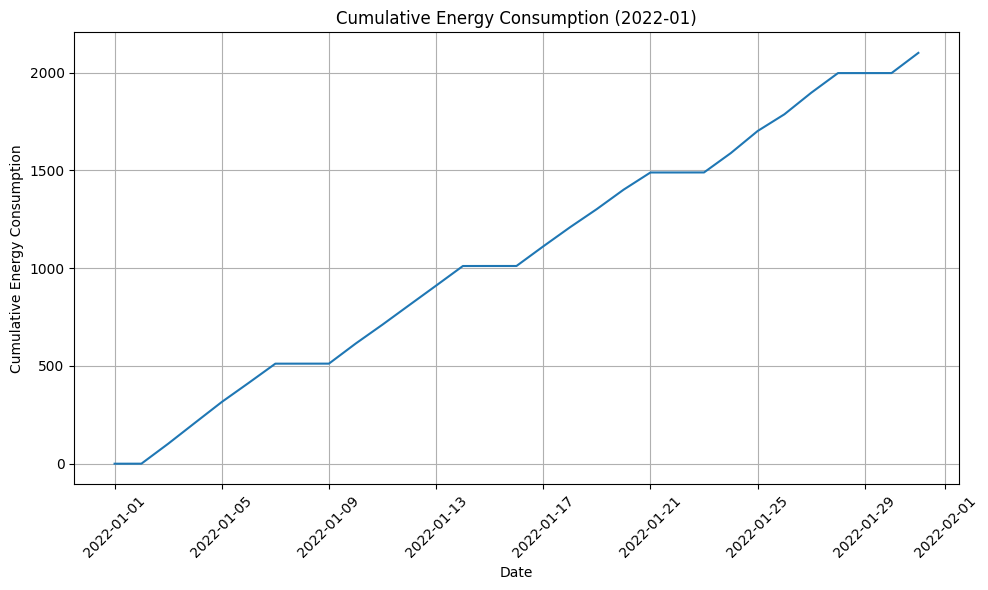

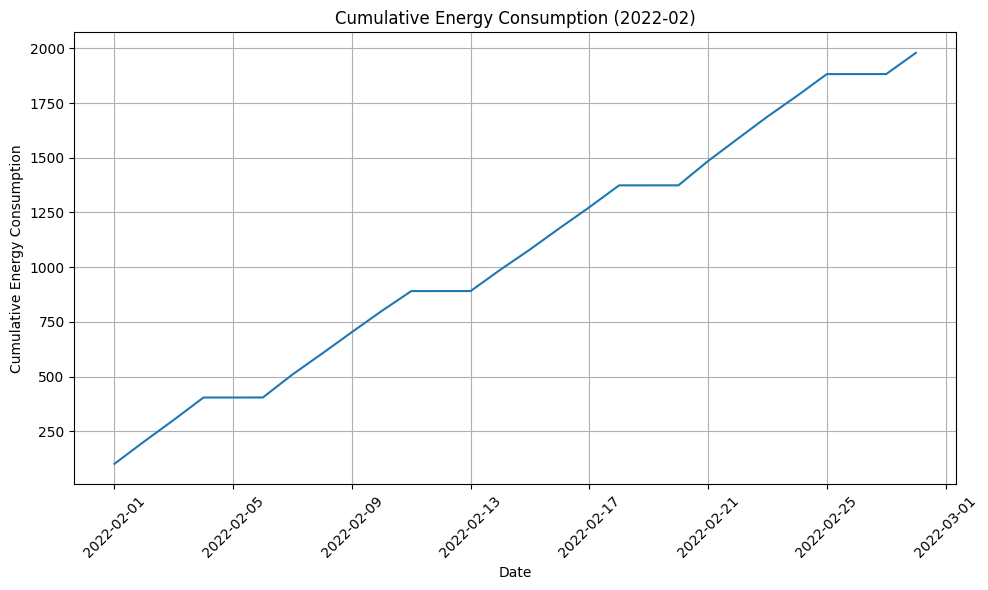

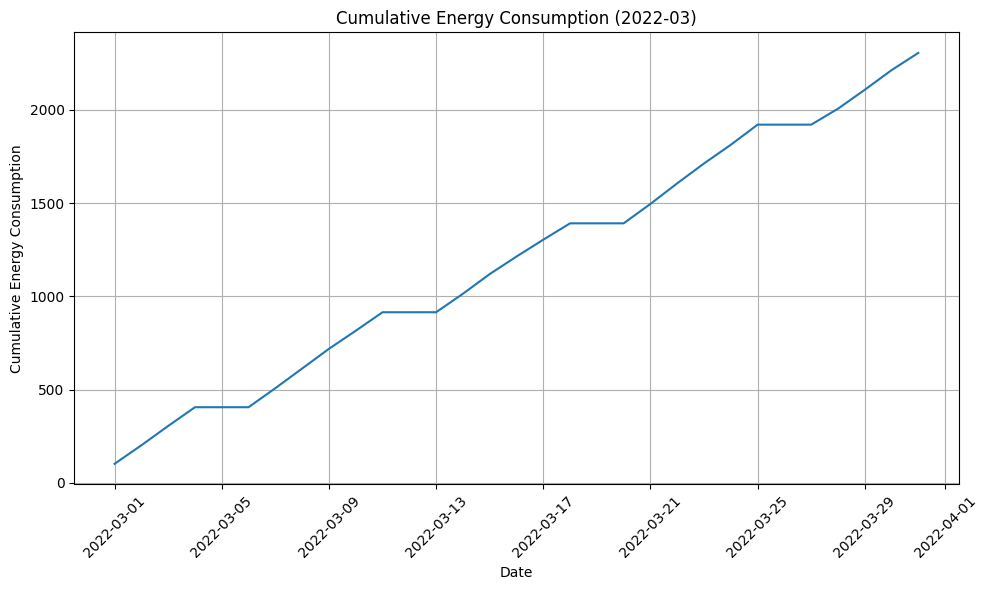

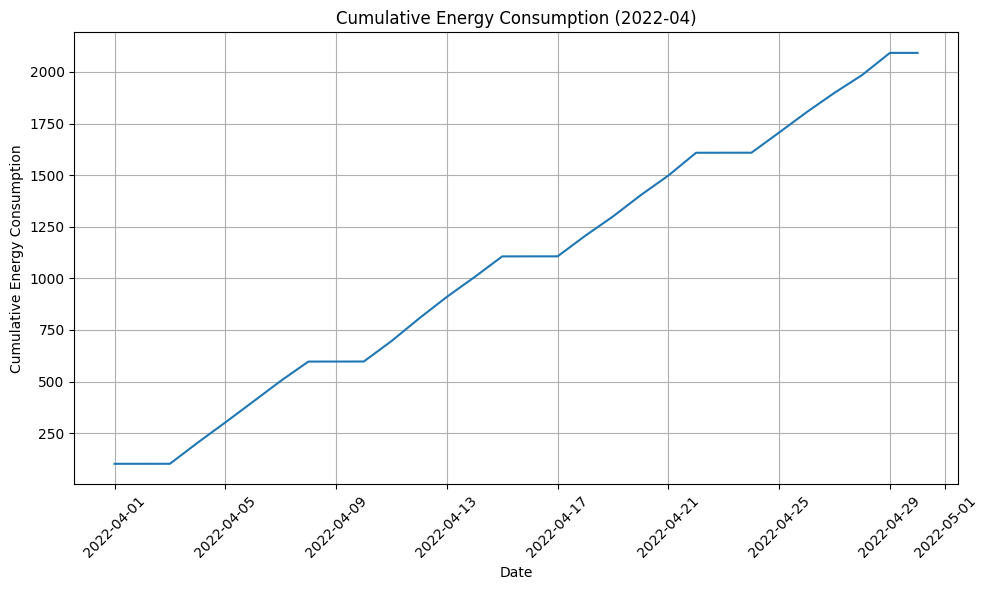

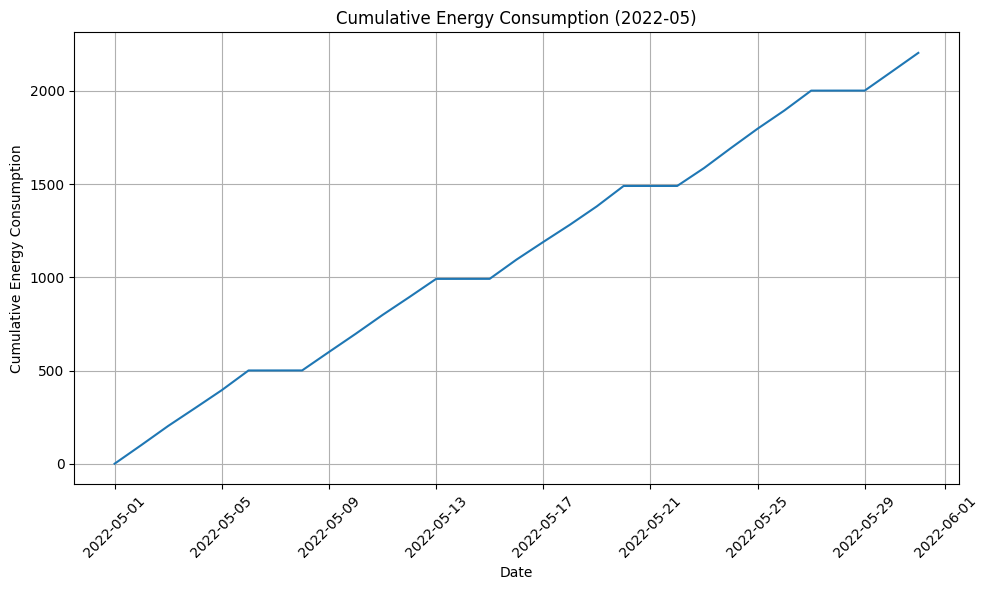

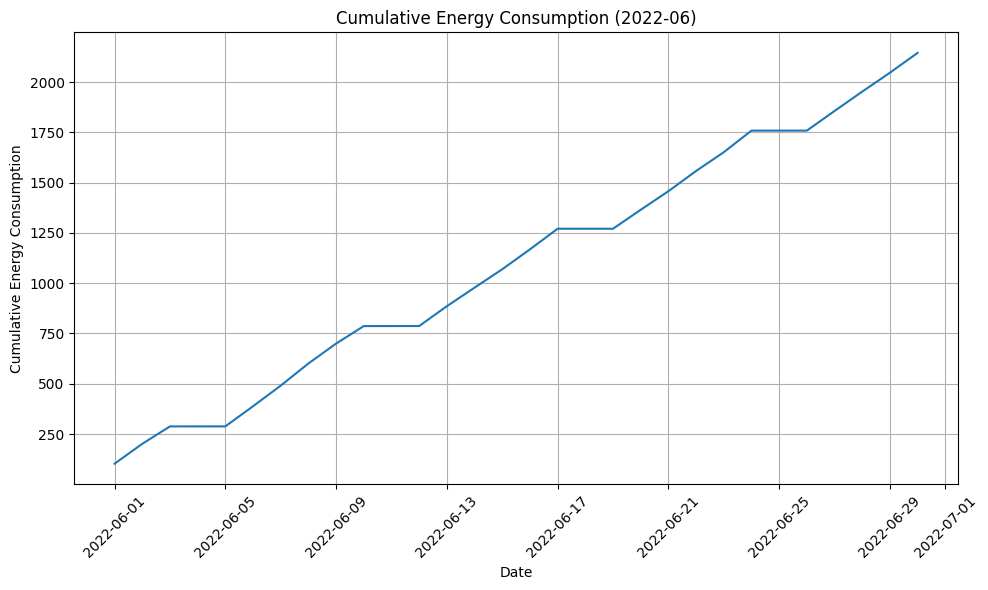

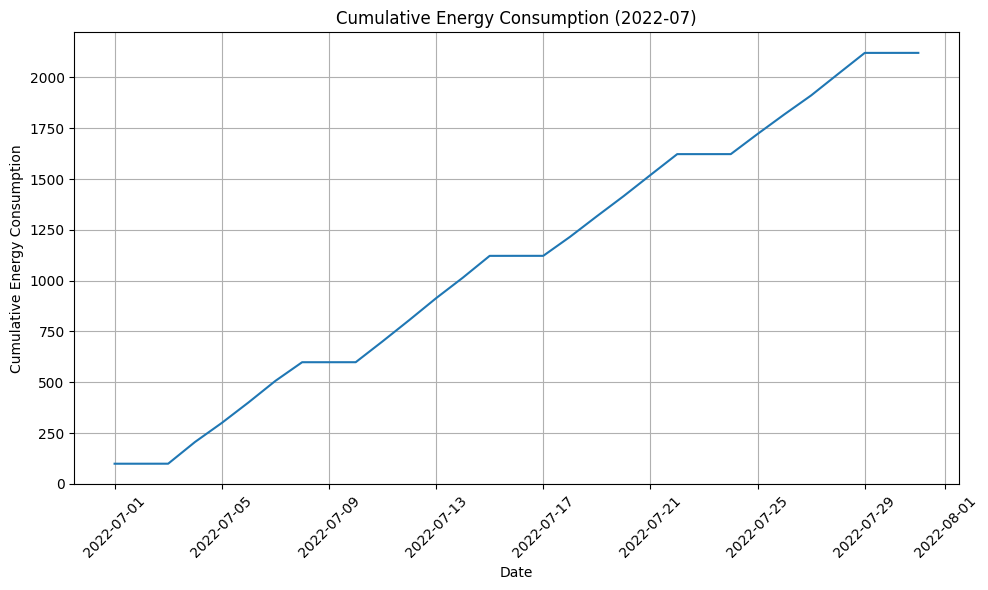

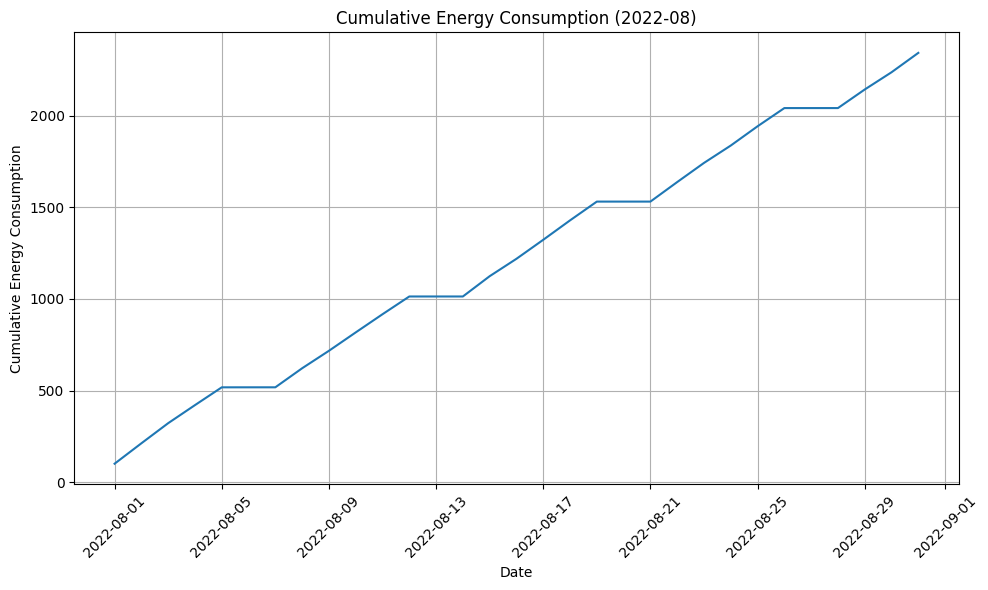

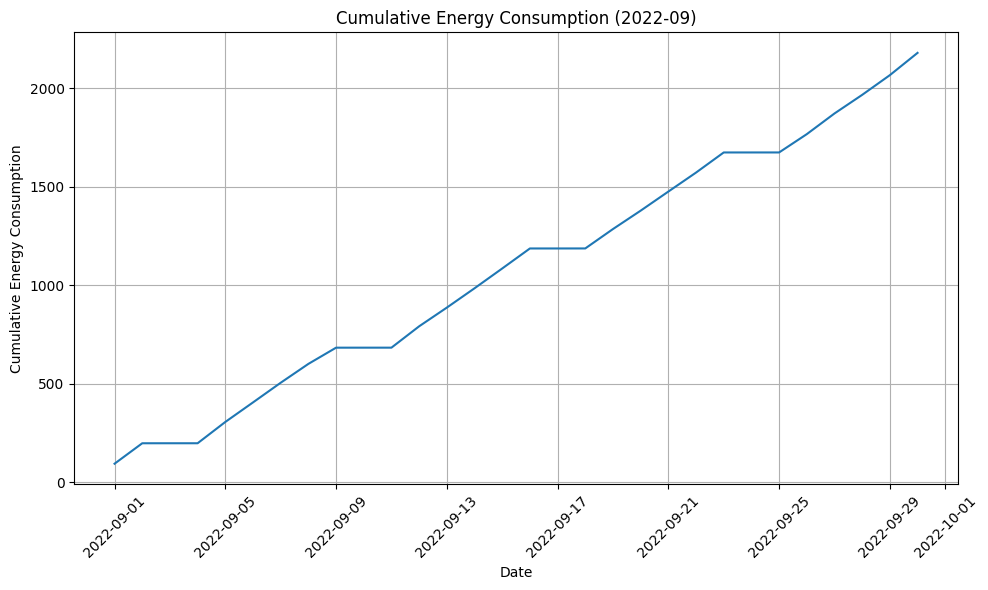

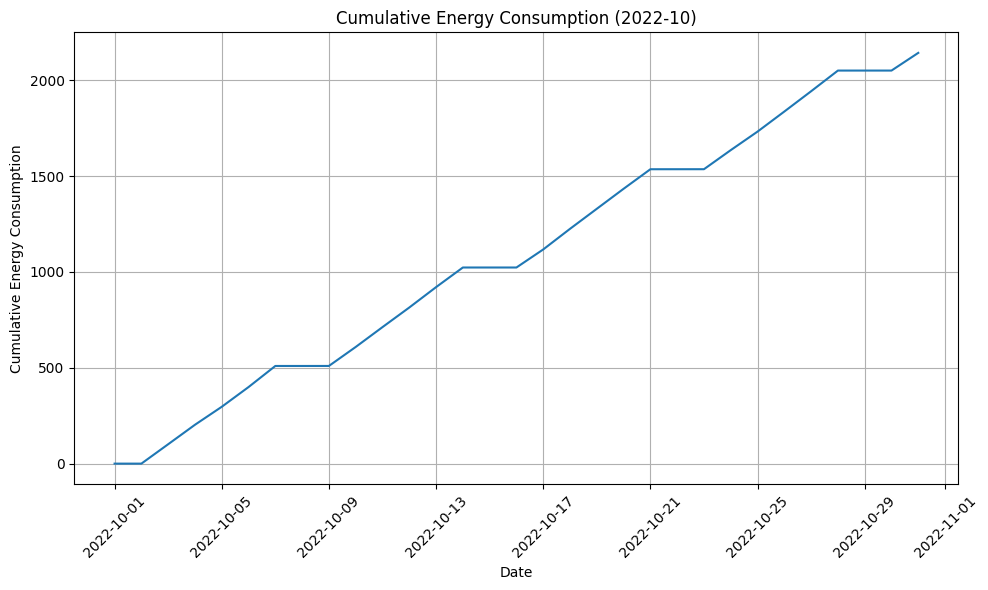

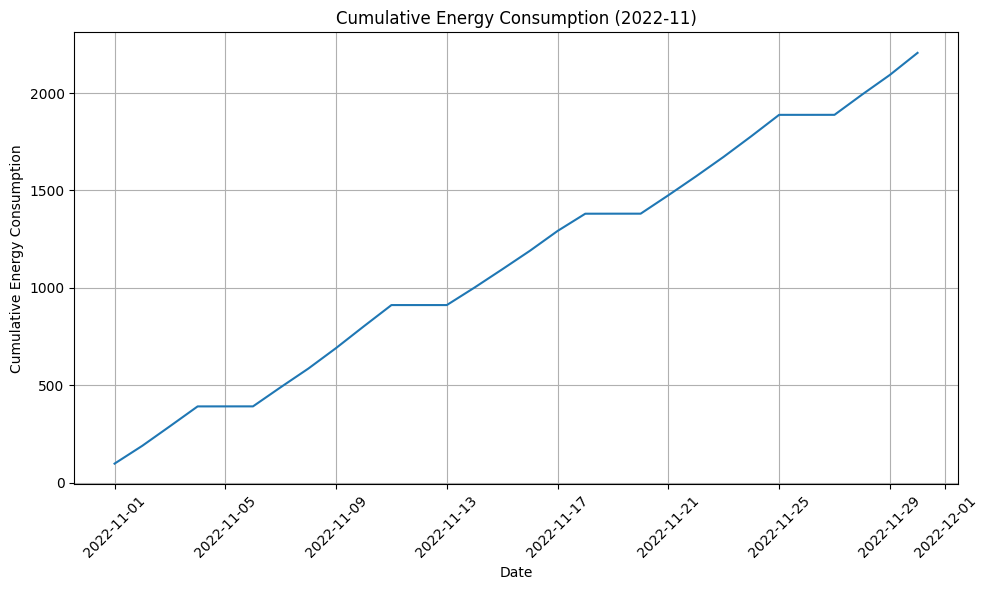

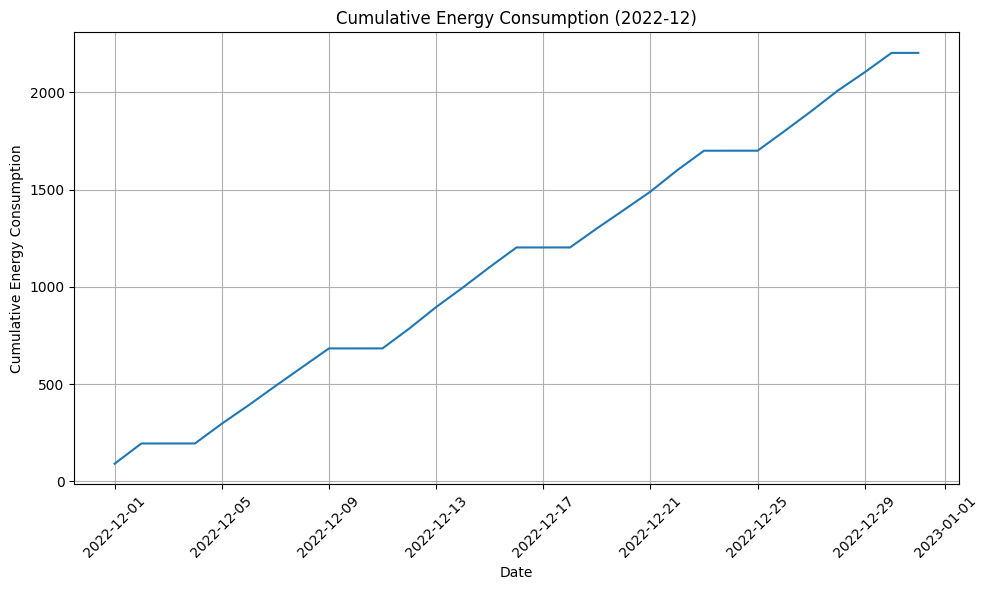

In [26]:
# Loop through each month and plot the cumulative energy consumption
for month, group in df.groupby('YearMonth'):
    plt.figure(figsize=(10, 6))
    plt.plot(group['Date'], group['Cumulative_Consumption'])
    plt.title(f'Cumulative Energy Consumption ({month})')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Energy Consumption')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi_co1e4u/gn885rxh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi_co1e4u/wmjfrzyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5361', 'data', 'file=/tmp/tmpi_co1e4u/gn885rxh.json', 'init=/tmp/tmpi_co1e4u/wmjfrzyd.json', 'output', 'file=/tmp/tmpi_co1e4u/prophet_model7bvidwpb/prophet_model-20231006090142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:01:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:01:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


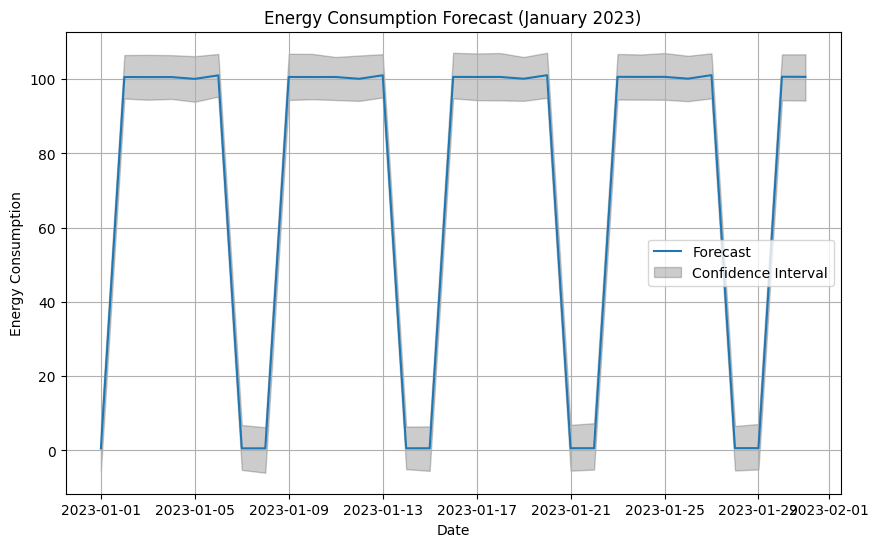

In [30]:
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = df[['Date', 'Energy_Consumption']]
prophet_data.columns = ['ds', 'y']

# Create and fit the model
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(prophet_data)

# Create a DataFrame for future dates (January 2023)
future_dates = model.make_future_dataframe(periods=31, freq='D')

# Predict energy consumption
forecast = model.predict(future_dates)

# Filter the forecast DataFrame to only include January 2023
forecast_jan_2023 = forecast.loc[forecast['ds'] >= '2023-01-01']

# Plot the forecast for January 2023
plt.figure(figsize=(10, 6))
plt.plot(forecast_jan_2023['ds'], forecast_jan_2023['yhat'], label='Forecast')
plt.fill_between(forecast_jan_2023['ds'], forecast_jan_2023['yhat_lower'], forecast_jan_2023['yhat_upper'], color='k', alpha=0.2, label='Confidence Interval')
plt.title('Energy Consumption Forecast (January 2023)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()


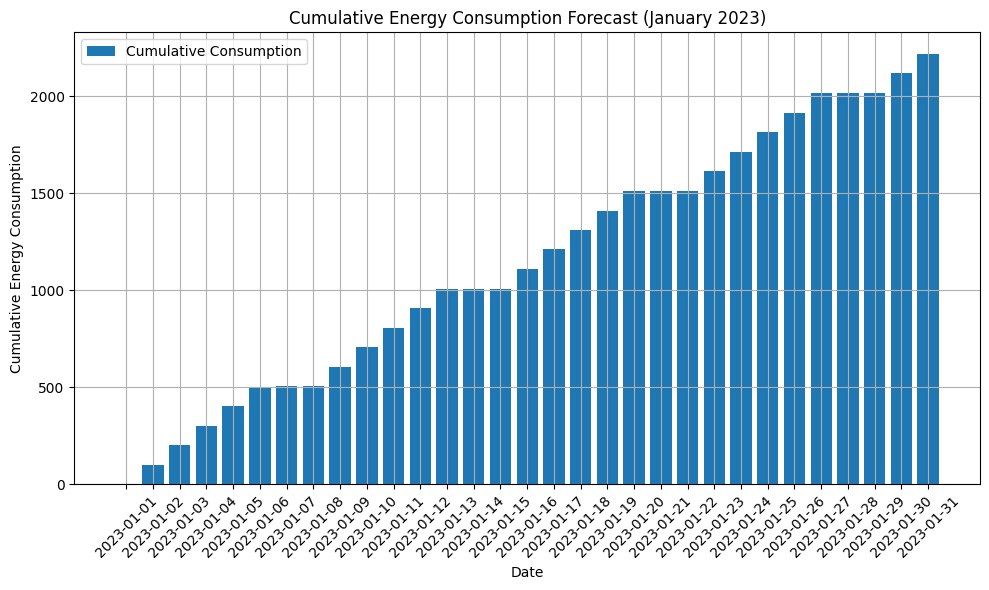

In [31]:
# Calculate the cumulative energy consumption for January 2023
forecast_jan_2023 = forecast_jan_2023.assign(Cumulative_Consumption=forecast_jan_2023['yhat'].cumsum())

# Plot the cumulative energy consumption for January 2023
plt.figure(figsize=(10, 6))
plt.bar(forecast_jan_2023['ds'].dt.strftime('%Y-%m-%d'), forecast_jan_2023['Cumulative_Consumption'], label='Cumulative Consumption')
plt.title('Cumulative Energy Consumption Forecast (January 2023)')
plt.xlabel('Date')
plt.ylabel('Cumulative Energy Consumption')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Optional: rotate the x-axis labels for better readability
plt.tight_layout()  # Optional: adjust the layout to prevent clipping of labels
plt.show()
